# Abrindo o banco de dados

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

"""
  #Escopo
    Ficou sob sua responsabilidade analisar os dados que seu time processou e
    encontrar qual o paciente(s) que possui maior risco de vida. Você avaliou e
    encontrou também a faixa de MCC e o MCC médio dos pacientes.
"""

db = pd.read_excel("dadosmedicossaude.xlsx")
db.head()

,nome do paciente anonimizado,altura,peso,risco cardiaco,status de vitaminas
0,paciente 1,1.53,112,Risco,NaN
1,paciente 2,1.68,104,Risco,NaN
2,paciente 3,1.72,86,sem risco,NaN
3,paciente 4,1.64,45,sem risco,NaN
4,paciente 5,1.83,83,sem risco,NaN


# Calculando o IMC

In [70]:
# Verificar a qtd de linhas nulas
db.isnull().sum()

nome do paciente anonimizado        0
altura                              0
peso                                0
risco cardiaco                      0
status de vitaminas             28150
dtype: int64

In [55]:
# sera que podemos explorar a coluna: status de vitaminas?
print("Quais valores existem na coluna?: ",db['status de vitaminas'].unique())
print("Porcentagem de linhas nulas: ",(db['status de vitaminas'].isnull().sum() / len(db))*100)


Quais valores existem na coluna?:  [nan 'Baixa de vitaminas']
Porcentagem de linhas nulas:  93.79894038852422


In [71]:
""" calcular o IMC """

# cria uma coluna IMC e já calcula:
db['IMC'] = db['peso'] / (db['altura']**2)  

def classificacao( imc_paciente, atribuir_legenda = False):
    # Matriz de referência para classificar os pacientes
    itens = [('Abaixo do peso',18.5), 
             ('Peso Normal',25), 
             ('Sobrepeso',30), 
             ('Obesidade grau 1',35), 
             ('Obesidade grau 2',40), 
             ('Obesidade grau 3 ou mórbida', float('inf'))]

    # vamor retornar ou um indice de imc ou a legenda 
    # (o indice vai ser importante para plotar cada tipo de paciente)
    for indice,(legenda, limite) in enumerate(itens):
        if imc_paciente < limite:
            return legenda if atribuir_legenda else indice

# cria uma matriz e atribui o IMC
db['IMC_tipo'] = db['IMC'].apply( lambda x: classificacao(x))            
db['IMC_Classificacao'] = db['IMC'].apply( lambda x: classificacao(x,True))

# calcular o IMC medio
IMC_medio = db['IMC'].sum()/len(db)
print('A classificação do IMC médio: ',IMC_medio,' é na faixa de', classificacao(IMC_medio,True))





# mostra a tabela com o IMC calculado e as legendas de cada classificação
db.head()

A classificação do IMC médio:  29.34040953335218  é na faixa de Sobrepeso


,nome do paciente anonimizado,altura,peso,risco cardiaco,status de vitaminas,IMC,IMC_tipo,IMC_Classificacao
0,paciente 1,1.53,112,Risco,NaN,47.844846,5,Obesidade grau 3 ou mórbida
1,paciente 2,1.68,104,Risco,NaN,36.848073,4,Obesidade grau 2
2,paciente 3,1.72,86,sem risco,NaN,29.069767,2,Sobrepeso
3,paciente 4,1.64,45,sem risco,NaN,16.731112,0,Abaixo do peso
4,paciente 5,1.83,83,sem risco,NaN,24.784258,1,Peso Normal


# Procurando os pacientes com o maior risco de vida

In [108]:
# Existem 2 possibilidades de ter risco de vida a patir do IMC: ou muito alto, ou muito baixo

# criar uma coluna, se é ou nao extremo
db['Extremo'] = db['IMC_tipo'].apply( lambda x: x in [0,5])    
db[ db['Extremo'] == True]

,nome do paciente anonimizado,altura,peso,risco cardiaco,status de vitaminas,IMC,IMC_tipo,IMC_Classificacao,Extremo
0,paciente 1,1.53,112,Risco,NaN,47.844846,5,Obesidade grau 3 ou mórbida,True
3,paciente 4,1.64,45,sem risco,NaN,16.731112,0,Abaixo do peso,True
5,paciente 6,1.60,108,Risco,NaN,42.187500,5,Obesidade grau 3 ou mórbida,True
6,paciente 7,1.59,114,Risco,NaN,45.093153,5,Obesidade grau 3 ou mórbida,True
7,paciente 8,1.42,112,Risco,NaN,55.544535,5,Obesidade grau 3 ou mórbida,True
...,...,...,...,...,...,...,...,...,...
29994,paciente 29995,1.73,54,sem risco,NaN,18.042701,0,Abaixo do peso,True
29996,paciente 29997,1.55,102,Risco,NaN,42.455775,5,Obesidade grau 3 ou mórbida,True
29998,paciente 29999,1.95,64,sem risco,NaN,16.831032,0,Abaixo do peso,True
30001,paciente 30002,1.68,43,sem risco,NaN,15.235261,0,Abaixo do peso,True


Distribuição do IMC, considerando a altura em função do Peso, cada cor representa uma classificação de do IMC


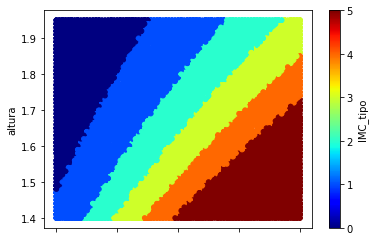

In [77]:
print("Distribuição do IMC, considerando a altura em função do Peso, cada cor representa uma classificação de do IMC")
db.plot(kind='scatter', x ='peso', y='altura',  c ='IMC_tipo', cmap=plt.get_cmap("jet"),  legend=True )



In [93]:
# O que vamos considerar para encontrar o paciente com o maior risco de vida?
# 1.risco cardiáco
# 2.imc Extremo
# 3.status de vitaminas - Mas o quanto isso interfere?

# vamos inicialmente considerar apenas o item 1 e 2



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68be238390>,
      dtype=object)

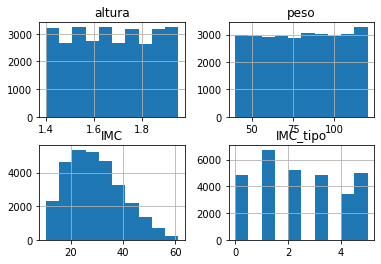

In [95]:
# como estão distribuido os dados?
db.hist()

In [97]:
#Vamos ordenar o IMC...
#Agora só falta dados clínicos demonstrando um crescimento do IMC com o risco de vida.
db.sort_values('IMC',ascending=False)

,nome do paciente anonimizado,altura,peso,risco cardiaco,status de vitaminas,IMC,IMC_tipo,IMC_Classificacao,Extremo
21219,paciente 21220,1.40,120,Risco,NaN,61.224490,5,Obesidade grau 3 ou mórbida,True
3257,paciente 3258,1.40,120,Risco,NaN,61.224490,5,Obesidade grau 3 ou mórbida,True
21133,paciente 21134,1.40,120,Risco,NaN,61.224490,5,Obesidade grau 3 ou mórbida,True
6028,paciente 6029,1.40,120,Risco,NaN,61.224490,5,Obesidade grau 3 ou mórbida,True
27112,paciente 27113,1.40,119,Risco,NaN,60.714286,5,Obesidade grau 3 ou mórbida,True
...,...,...,...,...,...,...,...,...,...
23954,paciente 23955,1.95,40,sem risco,Baixa de vitaminas,10.519395,0,Abaixo do peso,True
15341,paciente 15342,1.95,40,sem risco,Baixa de vitaminas,10.519395,0,Abaixo do peso,True
3629,paciente 3630,1.95,40,sem risco,Baixa de vitaminas,10.519395,0,Abaixo do peso,True
8166,paciente 8167,1.95,40,sem risco,Baixa de vitaminas,10.519395,0,Abaixo do peso,True


In [102]:
# Se o paciente com o maior IMC já tem um risco cardíaco, me parece um bom suspeito:
db[ db['IMC'] == db['IMC'].max() ]


,nome do paciente anonimizado,altura,peso,risco cardiaco,status de vitaminas,IMC,IMC_tipo,IMC_Classificacao,Extremo
3257,paciente 3258,1.4,120,Risco,NaN,61.22449,5,Obesidade grau 3 ou mórbida,True
6028,paciente 6029,1.4,120,Risco,NaN,61.22449,5,Obesidade grau 3 ou mórbida,True
21133,paciente 21134,1.4,120,Risco,NaN,61.22449,5,Obesidade grau 3 ou mórbida,True
21219,paciente 21220,1.4,120,Risco,NaN,61.22449,5,Obesidade grau 3 ou mórbida,True


 -  Conclusão

In [107]:
# Como existem bastante pacientes com indices iguais, vamos imprimir os 10 maiores com maior risco de vida
db.sort_values('IMC',ascending=False).head(10)

,nome do paciente anonimizado,altura,peso,risco cardiaco,status de vitaminas,IMC,IMC_tipo,IMC_Classificacao,Extremo
21219,paciente 21220,1.4,120,Risco,NaN,61.224490,5,Obesidade grau 3 ou mórbida,True
3257,paciente 3258,1.4,120,Risco,NaN,61.224490,5,Obesidade grau 3 ou mórbida,True
21133,paciente 21134,1.4,120,Risco,NaN,61.224490,5,Obesidade grau 3 ou mórbida,True
6028,paciente 6029,1.4,120,Risco,NaN,61.224490,5,Obesidade grau 3 ou mórbida,True
27112,paciente 27113,1.4,119,Risco,NaN,60.714286,5,Obesidade grau 3 ou mórbida,True
540,paciente 541,1.4,119,Risco,NaN,60.714286,5,Obesidade grau 3 ou mórbida,True
23396,paciente 23397,1.4,119,Risco,NaN,60.714286,5,Obesidade grau 3 ou mórbida,True
11227,paciente 11228,1.4,119,Risco,NaN,60.714286,5,Obesidade grau 3 ou mórbida,True
2982,paciente 2983,1.4,119,Risco,NaN,60.714286,5,Obesidade grau 3 ou mórbida,True
10921,paciente 10922,1.4,119,Risco,NaN,60.714286,5,Obesidade grau 3 ou mórbida,True
